## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
        

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)

from IPython.display import display

from sklearn.datasets import load_iris

## Loading Data

In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df['target'] = data.target

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df = df.astype({'target':'category'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## EDA

### 'Uni_plot' class from ``alearn`` library to help us with visualizations

In [8]:
from alearn import uni_plot

#### Numerical Features

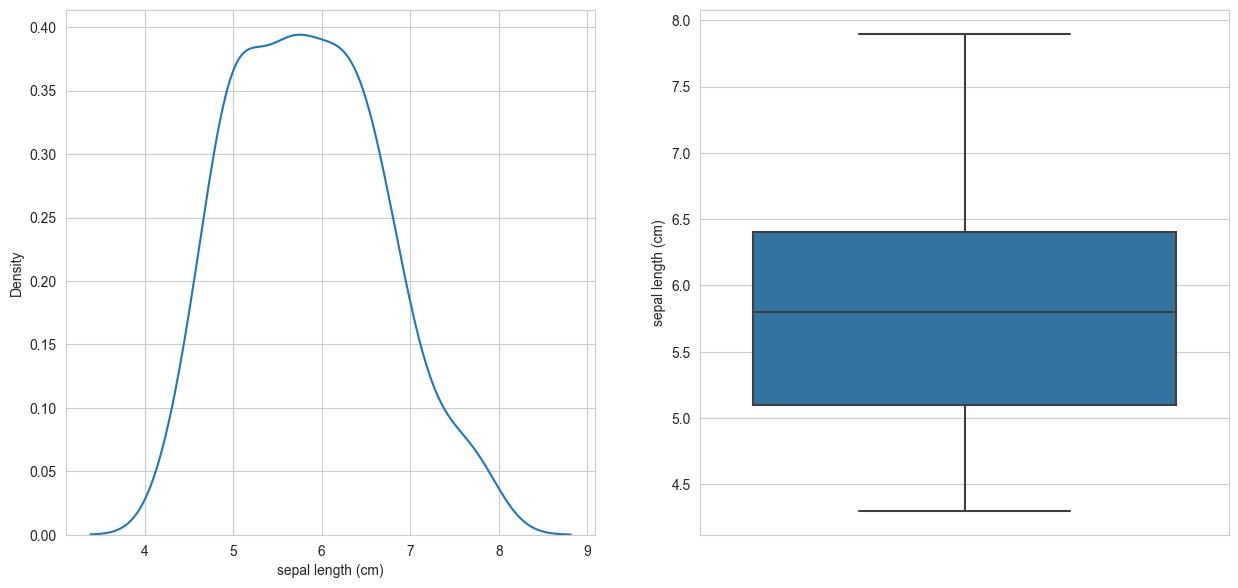

##################################################     SEPAL LENGTH (CM)     ##################################################


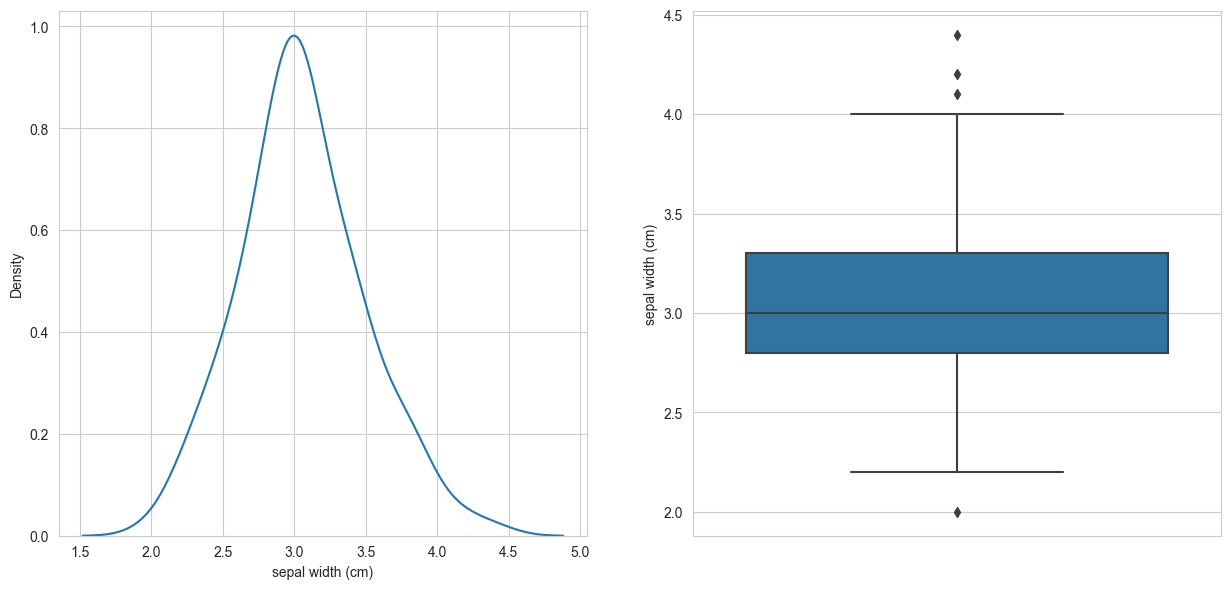

##################################################     SEPAL WIDTH (CM)     ##################################################


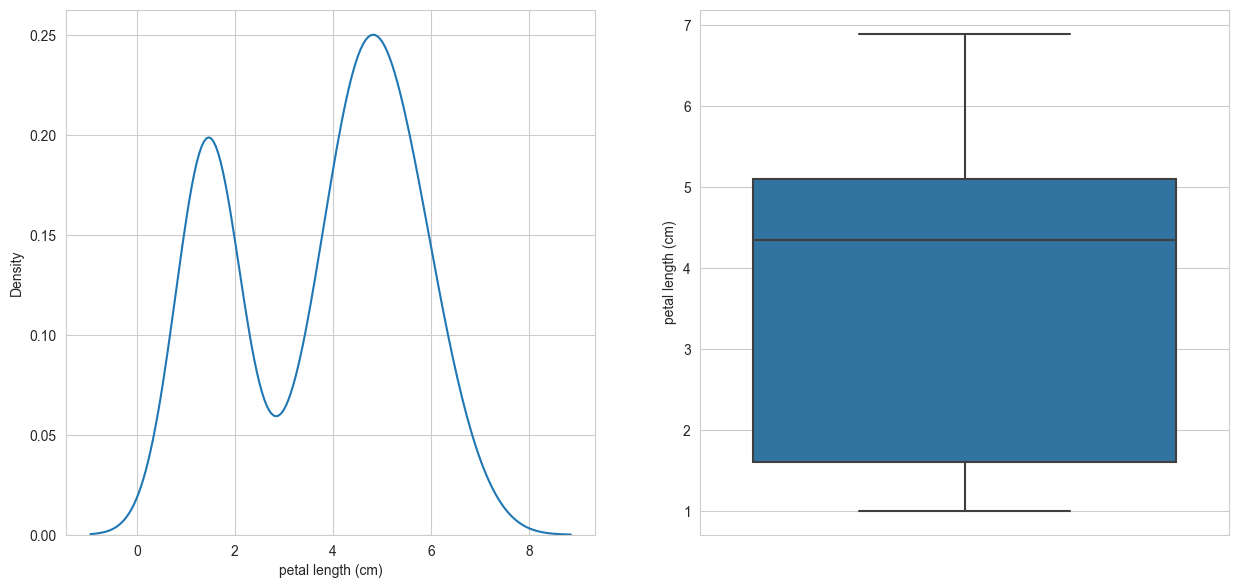

##################################################     PETAL LENGTH (CM)     ##################################################


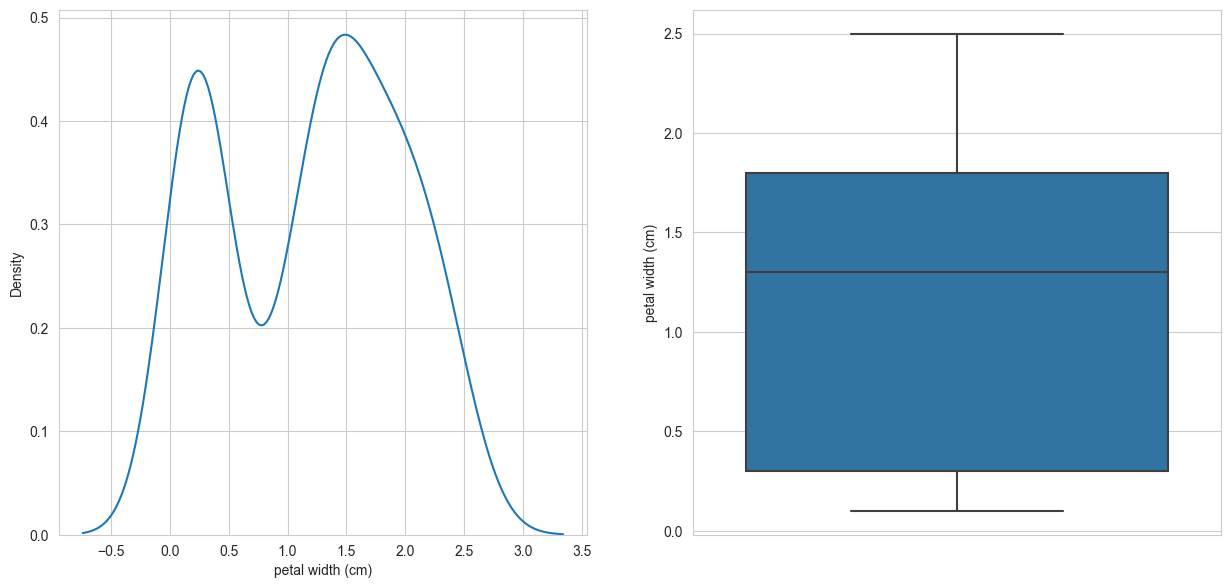

##################################################     PETAL WIDTH (CM)     ##################################################


In [9]:
uni_plot.num(df)

#### Categorical Features

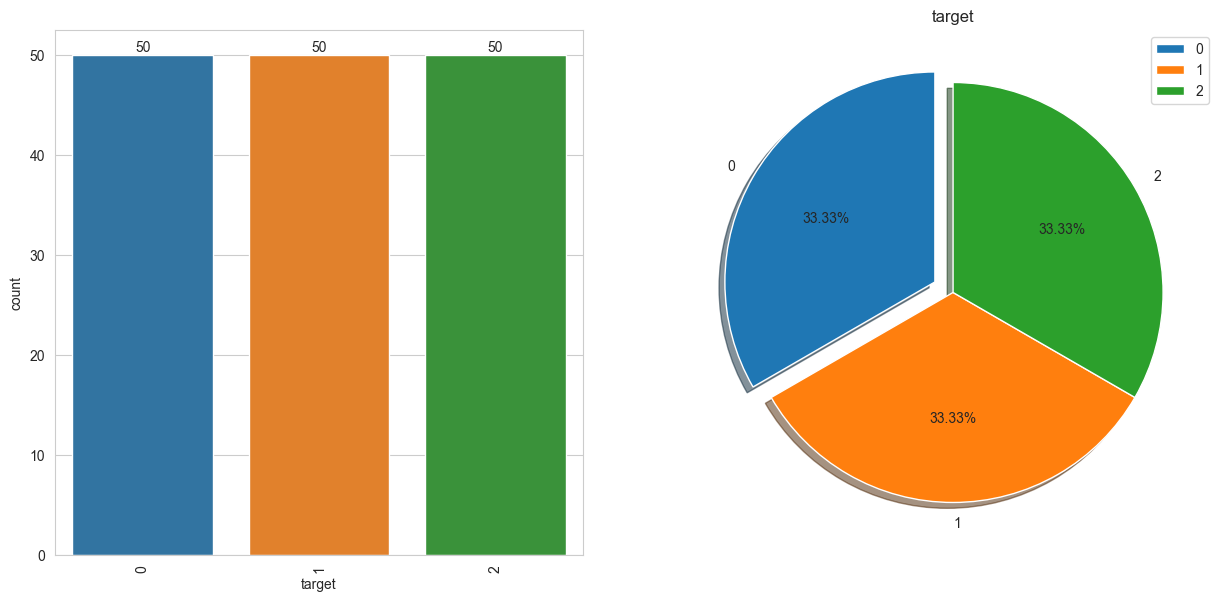

In [10]:
uni_plot.cat(df,col='target')

## Pre-Processing

### 'Preprocessing' function from alearn library to automate the steps

In [11]:
from alearn import preprocessing

In [12]:
x_train_con,x_test_con,y_train,y_test,new_cols = preprocessing(data=df,target='target',
    drop_cols=[],
    label_encode=False,
    class_imbalance=False,
    classification=True)

============================DROPPING UNNECESSARY COLUMNS====================================
After dropping unnecessary columns: (150, 5)
=================================DEALING WITH DATATYPES====================================
Object Columns:
 Index([], dtype='object')
After converting dtypes:
 sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target               category
dtype: object
==================================SPLITTING X and Y========================================
x shape: (150, 4)
y shape: (150,)
cat_attr 
Index([], dtype='object')
num_attr 
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
=========================SPLITTING DATA AS TRAINING and TESTING=============================
x_train (120, 4)
x_test (30, 4)
y_train (120,)
y_test (30,)
==============================IMPUTING NULL VALUES====================================
After 

## Model Building

### 'Classification_model_building' function from alearn to automate the model building 

In [13]:
from alearn import classification_model_building

In [14]:
error_df = classification_model_building(x_train_con,x_test_con,y_train,y_test)

In [15]:
error_df

,DecisionTree_Train,DecisionTree_Test,RandomForest_Train,RandomForest_Test,KNeighbors_Train,KNeighbors_Test,SVC_Train,SVC_Test,LogisticRegression_Train,LogisticRegression_Test,XGBClassifier_Train,XGBClassifier_Test,AdaBoostClassifier_Train,AdaBoostClassifier_Test,GradientBoostingClassifier_Train,GradientBoostingClassifier_Test
Accuracy score,1.0,0.833333,1.0,0.933333,0.975000,0.900000,0.991667,0.933333,0.975000,0.933333,1.0,0.933333,0.975000,0.966667,1.0,0.966667
Recall score,1.0,0.833333,1.0,0.933333,0.975000,0.900000,0.991667,0.933333,0.975000,0.933333,1.0,0.933333,0.975000,0.966667,1.0,0.966667
Precision score,1.0,0.835017,1.0,0.944444,0.975193,0.902357,0.991870,0.944444,0.975193,0.944444,1.0,0.933333,0.975193,0.969697,1.0,0.969697
F1 Score,1.0,0.832916,1.0,0.932660,0.974996,0.899749,0.991665,0.932660,0.974996,0.932660,1.0,0.933333,0.974996,0.966583,1.0,0.966583
